In [2]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
import numpy as np
import seaborn as sns
from collections import Counter


rand_spearman = pd.read_csv("../../bioinfo/qual-project/tcga/rand_prot_mrna_spearman.txt",delimiter="\t")
spearman      = pd.read_csv("../../bioinfo/qual-project/tcga/mrna_prot_fold_change_spearman.txt",delimiter="\t")

### Random Data Spearman Correlational Coefficient Distribution


count    9989.000000
mean       -0.002659
std         0.256201
min        -0.893304
25%        -0.181016
50%        -0.002941
75%         0.173529
max         0.778514
Name: spearman, dtype: float64


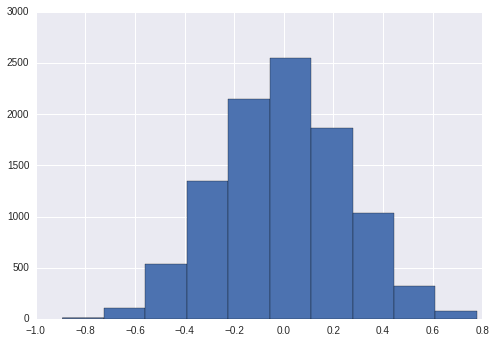

In [2]:
plt.hist(sorted(rand_spearman['spearman'].dropna()))
print rand_spearman['spearman'].describe()


### Standard Data Spearman Correlational Coefficient Distribution

count    9963.000000
mean       -0.272738
std         0.285906
min        -0.941176
25%        -0.488235
50%        -0.288235
75%        -0.079412
max         0.725946
Name: spearman, dtype: float64


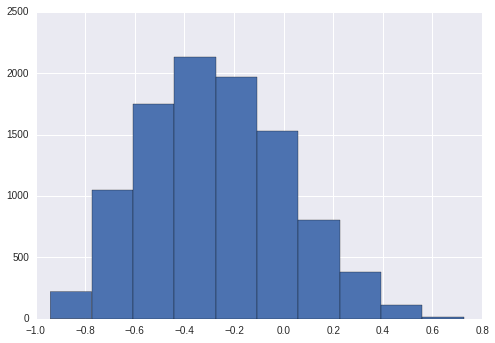

In [3]:
plt.hist(sorted(spearman['spearman'].dropna()))
print spearman['spearman'].describe()


### K-S test for distributions

In [4]:
ks_2samp(rand_spearman['spearman'], spearman['spearman'])

(0.38282110321353491, 0.0)

In [11]:
print '\n'.join(list(spearman['gene'][spearman['spearman'] < -.85]))

ABCE1
ANXA6
ASS1
C1orf123
C4orf33
C9orf64
CA12
CA8
CASP1
DNAJA2
DSCC1
FAM49B
GAMT
GARS
GGH
GMPS
HSPA4L
IFT46
IGFBP5
IRS1
KIAA0319L
KIAA0368
LIMCH1
NLRP2
NUDCD1
NUDT4
OCIAD2
OXCT1
P4HA1
PCM1
PHGDH
PIP4K2C
PLCB4
POLD3
S100A7A
SH2D4A
SIAH2
SNTB1
SPG20
SPRYD4
SSH3
SYAP1
SYTL4
TATDN1
THSD4
TK1
TLE3
TP53BP1
TPSB2
USP15


In [12]:
print '\n'.join(list(spearman['gene'][spearman['spearman'] > 0.6]))

ALKBH6
DENND1C
F2
JDP2
MARVELD2
OSTM1
SPATA13
TDP2


In [7]:
spearman[['gene']][spearman['spearman'] < -.85].to_csv(open("../../bioinfo/qual-project/tcga/genes_to_build.txt",'w'),sep="\t",index=False,header=False)

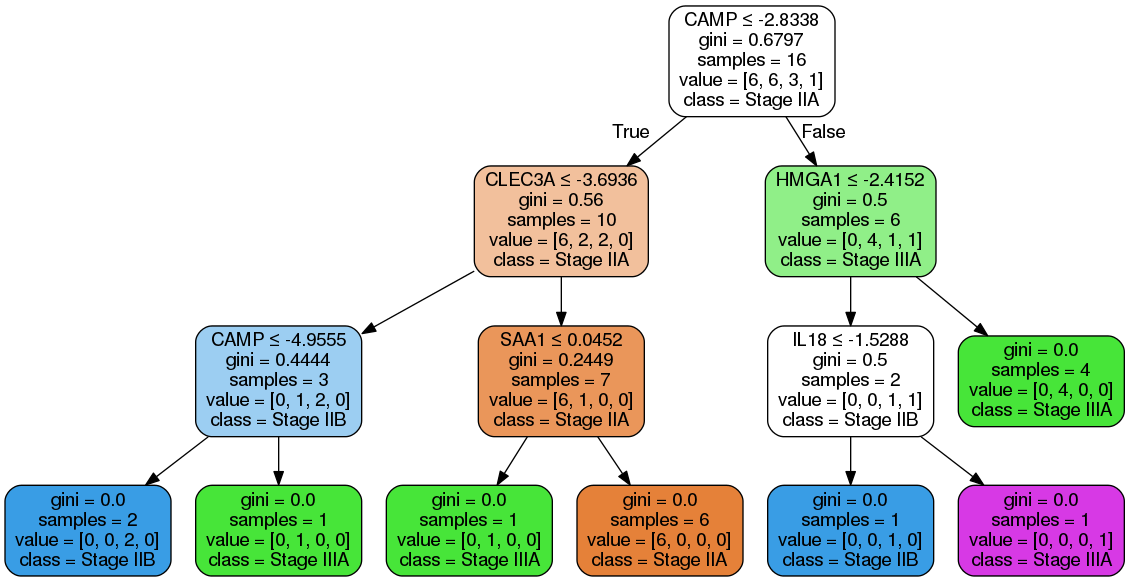

In [8]:
from IPython.display import Image
Image(filename='../../bioinfo/qual-project/tcga/original_gene_model.png')

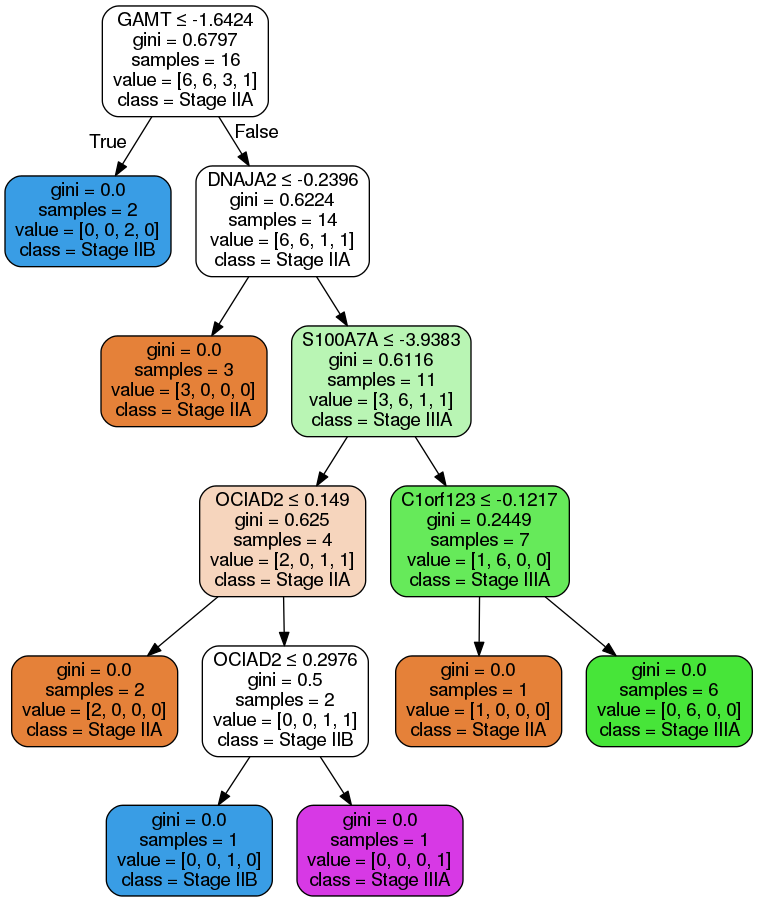

In [9]:
from IPython.display import Image
Image(filename='../../bioinfo/qual-project/tcga/spearman_model.png')

ITGA6
ALG1
ITGAX
THUMPD1
PRPF4B
HAUS2
CD40
SCN7A
CYP27A1
C2orf76
DEK
S100A16
SDHAF2
CA5B
EXOC5
UNK
C19orf55
ZNF414
CILP
PVALB
KCTD10
FAM171A2
GNAI2
HLA-F
ZC3HAV1
NSUN3
CHPF2
TRAPPC4
SLC4A2
STMN3
DENND1A
CPXM1
SERPINA5
LOXL3
MED21
FOXJ3
ZNF33A
CSTF1
DOCK11
LIN7A
CTDSP1
KIAA1328
NRBP1
IRX3
IL33
KDM5B
MSR1
ATP6AP1
MBNL1
AP4B1


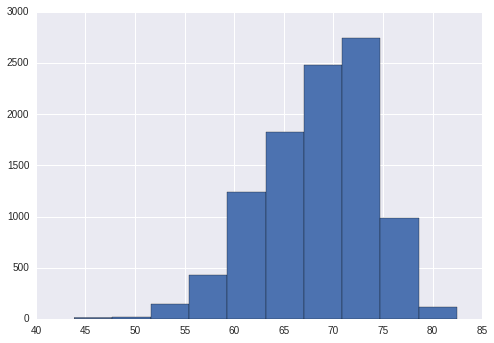

In [7]:
rand_results = pd.read_csv(open("../../bioinfo/qual-project/tcga/accuracies/random_fitting_accuracy.txt",'r'),delimiter="\t")
plt.hist(rand_results['accuracy'])

best_rand_genes = rand_results['genes'][rand_results['accuracy'] == rand_results['accuracy'].max()].values
print '\n'.join(best_rand_genes[0].split(':'))



(array([ 1421.,  1432.,  1457.,     0.,     0.,   693.,  1422.,   648.,
          737.,  2190.]),
 array([ 64.03508772,  64.73684211,  65.43859649,  66.14035088,
         66.84210526,  67.54385965,  68.24561404,  68.94736842,
         69.64912281,  70.35087719,  71.05263158]),
 <a list of 10 Patch objects>)

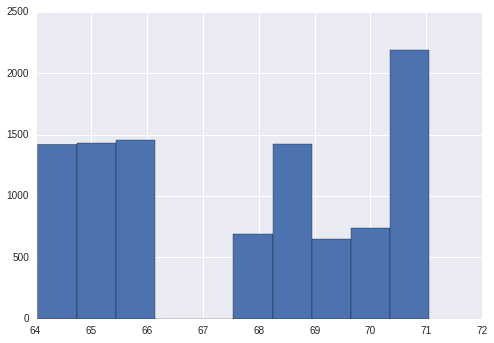

In [11]:
old_results = pd.read_csv(open("../../bioinfo/qual-project/tcga/old_genes_accuracies.txt",'r'),delimiter="\t")
plt.hist(old_results['accuracy'])

(array([  393.,     0.,  1065.,  1517.,  1109.,   737.,  1504.,  2238.,
          689.,   748.]),
 array([ 64.03508772,  65.        ,  65.96491228,  66.92982456,
         67.89473684,  68.85964912,  69.8245614 ,  70.78947368,
         71.75438596,  72.71929825,  73.68421053]),
 <a list of 10 Patch objects>)

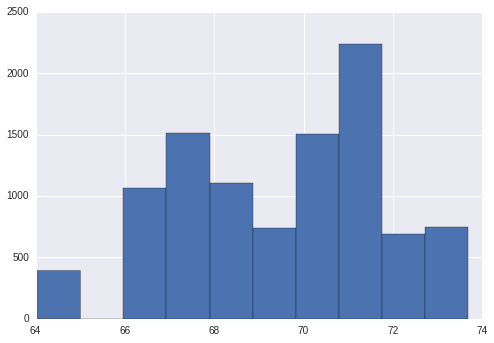

In [12]:
new_results = pd.read_csv(open("../../bioinfo/qual-project/tcga/genes_to_build_details_10k.txt",'r'),delimiter="\t")
plt.hist(new_results['accuracy'])

In [13]:
dys_patterns = pd.read_csv(open("../../bioinfo/qual-project/tcga/dys_patterns.txt"),delimiter="\t")
dys_patterns_unpivot = pd.melt(dys_patterns,id_vars=['gene'],var_name='sample')
print dys_patterns_unpivot.head()

    gene   sample  value
0   CAMP  A7-A0CE      0
1   LY6E  A7-A0CE      0
2   SAA1  A7-A0CE      0
3  MUCL1  A7-A0CE      2
4  FABP7  A7-A0CE      2

[5 rows x 3 columns]


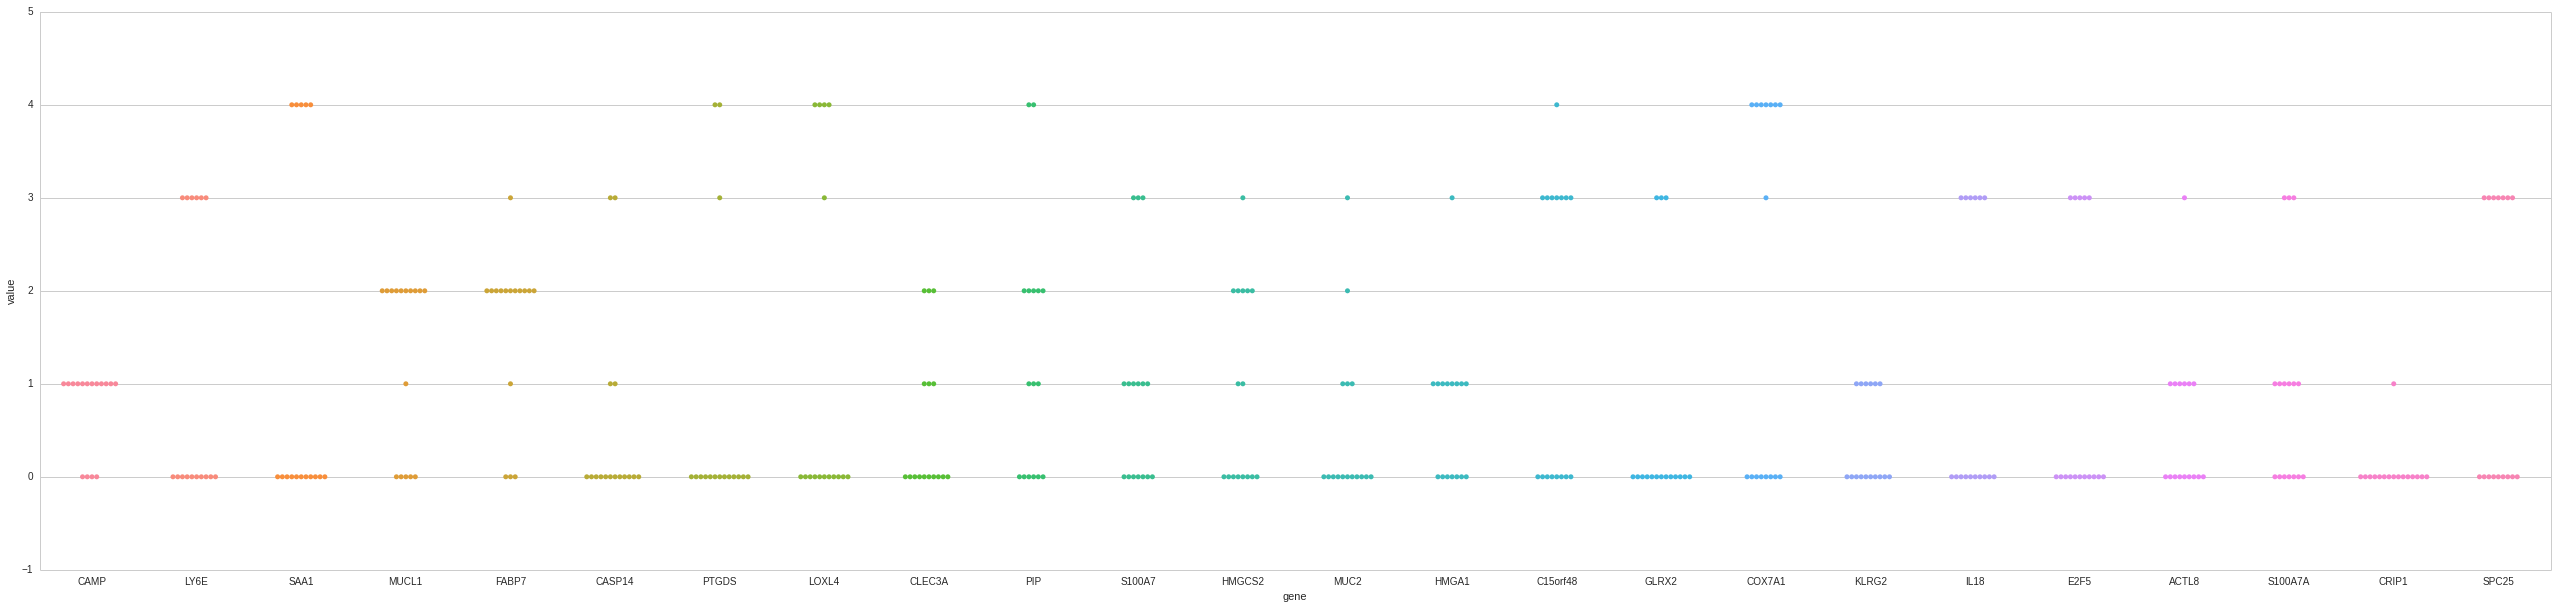

In [14]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(45,10))
sns.swarmplot(x="gene", y="value", data=dys_patterns_unpivot)


#1 = low prot low rna
#2 = low prot high rna
#3 = higher prot low rna
#4 = higher prot high rna

# TODO

* Cancer staging distribution
* Gene profiles from models
* Cluster?


#### Cancer staging

In [3]:
patient_meta = pd.read_csv(open("../../bioinfo/qual-project/tcga/new_patient_meta.txt",'r'),delimiter="\t")

#### Patient staging distribution over all available metadata

1100

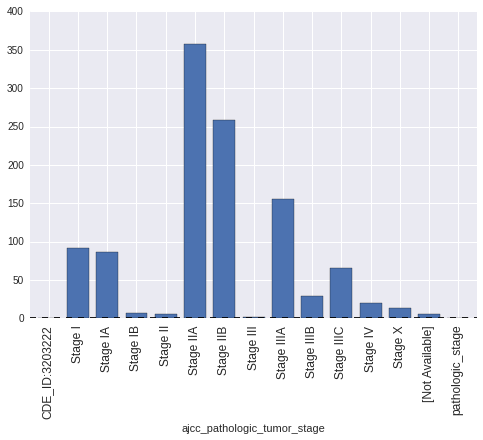

In [5]:
patient_meta.groupby('ajcc_pathologic_tumor_stage').size().plot(kind="bar")
len(patient_meta['bcr_patient_barcode'])

#### Gene contribution for neg. spearman correlation

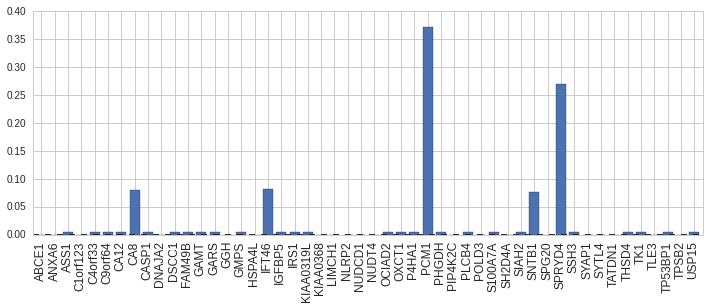

In [60]:
ignore_cols = ['match','total','accuracy']
keep_cols = [x for x in new_results.columns.tolist() if x not in ignore_cols]
new_results[keep_cols].mean(axis=0).plot(kind='bar',figsize=(12,4))
plt.savefig('pearson_genes_info_content.png')
x = new_results[keep_cols].mean(axis=0)
x[x > 0.05].to_csv(open("../../bioinfo/qual-project/tcga/most_info_new.txt",'w'),sep="\t")

#### Gene contribution from previous method

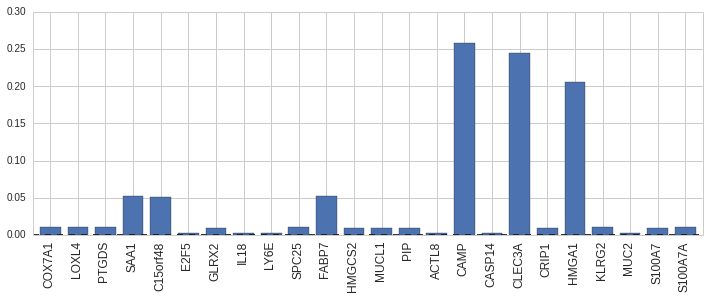

In [61]:
keep_cols = [x for x in old_results.columns.tolist() if x not in ignore_cols]
old_results[keep_cols].mean(axis=0).plot(kind='bar',figsize=(12,4))
plt.savefig('old_genes_info_content.png')
x = old_results[keep_cols].mean(axis=0)
x[x > 0.05].to_csv(open("../../bioinfo/qual-project/tcga/most_info_old_data.txt",'w'),sep="\t")

#### Positive correlated genes

(array([ 1973.,     0.,     0.,     0.,     0.,     0.,  5966.,     0.,
            0.,  2061.]),
 array([ 65.78947368,  66.22807018,  66.66666667,  67.10526316,
         67.54385965,  67.98245614,  68.42105263,  68.85964912,
         69.29824561,  69.73684211,  70.1754386 ]),
 <a list of 10 Patch objects>)

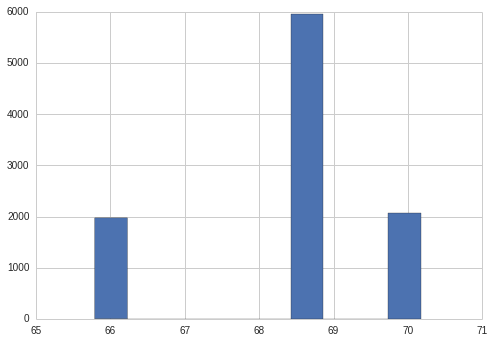

In [63]:
pos_results = pd.read_csv(open("../../bioinfo/qual-project/tcga/pos_spearman_accuracies.txt",'r'),delimiter="\t")
plt.hist(pos_results['accuracy'])

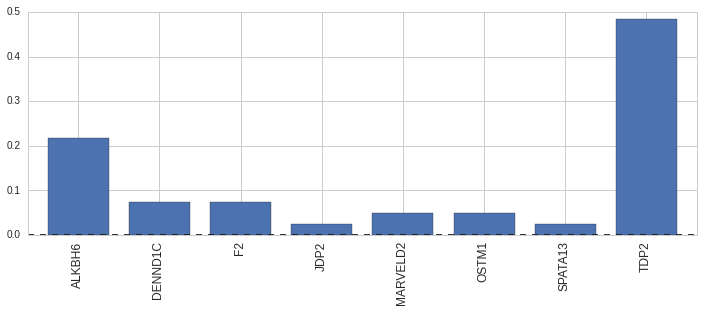

In [66]:
keep_cols = [x for x in pos_results.columns.tolist() if x not in ignore_cols]
pos_results[keep_cols].mean(axis=0).plot(kind='bar',figsize=(12,4))
plt.savefig('pos_genes_info_content.png')
x = pos_results[keep_cols].mean(axis=0)
x[x > 0.05].to_csv(open("../../bioinfo/qual-project/tcga/most_info_pos_data.txt",'w'),sep="\t")